# **DATA SCIENCE CASE: Spotify data set for popularity prediction**

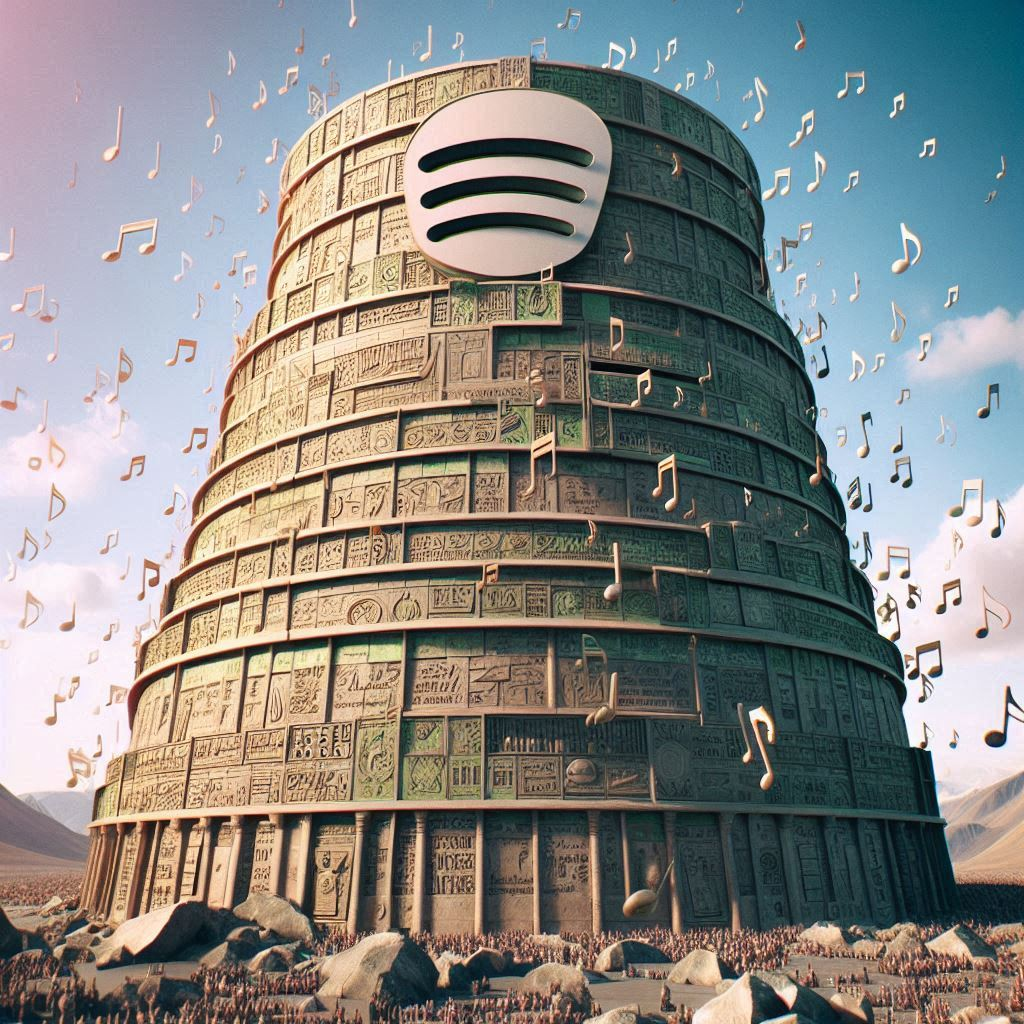

#### This notebook is a modelling of predictions for the data set. Consist on  features transformation, evaluation and fitting models in order to have a prediction of popularity  
#### Enumeration continues previous notebook

## **Libraries import and notebook prep**

In [ ]:
# Libraries
# Libraries for File and basics
import os
import pickle
import pandas as pd
import numpy as np
from google.colab import files
import io
import yaml

# Libraries for Machine Learning Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

# Libraries for Model Selection and Evaluation
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Libraries for Preprocessing and Feature Selection
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectFromModel

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading file
uploaded = files.upload()

Saving df_cleaned_0pop_years_reduced_genres_years_def.csv to df_cleaned_0pop_years_reduced_genres_years_def.csv


In [ ]:
#Basic inspections and cleaning
df = pd.read_csv(io.BytesIO(uploaded['df_cleaned_0pop_years_reduced_genres_years_def.csv']))
df = df.drop('genre_group', axis=1)
df.info()

print("")

print("....................................................................................................................................................")
print("Describe:")
print("....................................................................................................................................................")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194953 entries, 0 to 194952
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       194953 non-null  object 
 1   popularity        194953 non-null  int64  
 2   year              194953 non-null  int64  
 3   genre             194953 non-null  object 
 4   danceability      194953 non-null  float64
 5   energy            194953 non-null  float64
 6   key               194953 non-null  int64  
 7   loudness          194953 non-null  float64
 8   mode              194953 non-null  int64  
 9   speechiness       194953 non-null  float64
 10  acousticness      194953 non-null  float64
 11  instrumentalness  194953 non-null  float64
 12  liveness          194953 non-null  float64
 13  valence           194953 non-null  float64
 14  tempo             194953 non-null  float64
 15  duration_ms       194953 non-null  int64  
 16  time_signature    19

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,194953.000000,1.949530e+05,194953.000000
mean,32.896560,2019.812447,0.579824,0.650506,5.301970,-7.949773,0.616266,0.087812,0.303980,0.202349,0.206129,0.455839,123.268688,2.195792e+05,3.923674
std,15.212189,1.923840,0.164858,0.259400,3.577946,5.265474,0.486296,0.089202,0.334604,0.340969,0.178232,0.252008,29.907076,9.821753e+04,0.384823
min,1.000000,2017.000000,0.000000,0.000020,0.000000,-46.785000,0.000000,0.000000,0.000000,0.000000,0.009950,0.000000,0.000000,2.946700e+04,0.000000
25%,22.000000,2018.000000,0.469000,0.487000,2.000000,-9.350000,0.000000,0.037700,0.012800,0.000000,0.098800,0.245000,99.985000,1.734190e+05,4.000000
50%,32.000000,2020.000000,0.590000,0.706000,5.000000,-6.566000,1.000000,0.052000,0.151000,0.000254,0.128000,0.433000,123.006000,2.070000e+05,4.000000
75%,43.000000,2021.000000,0.703000,0.865000,8.000000,-4.726000,1.000000,0.094200,0.561000,0.279000,0.266000,0.654000,143.018000,2.486230e+05,4.000000
max,100.000000,2023.000000,0.988000,1.000000,11.000000,3.795000,1.000000,0.958000,0.996000,0.997000,1.000000,0.993000,247.465000,5.237296e+06,5.000000


# **5. FEATURE SELECTION AND SPLIT TRAIN TEST**


 **5.1.   Features selection**

 **5.2.   Train test split**


### **5.1.   Train test split**

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


### **5.2.   Features selection**


In [ ]:
target = 'popularity'

#### Numerical

In [ ]:
print(" Correlation with target")
corr = train_set.corr(numeric_only= True)
correlations_with_target = np.abs(np.abs(corr[target]).sort_values(ascending=False))
correlations_with_target

 Correlation with target


popularity          1.000000
duration_ms         0.145454
instrumentalness    0.141190
danceability        0.127397
year                0.098867
liveness            0.081357
energy              0.077282
speechiness         0.051018
tempo               0.040681
loudness            0.035239
acousticness        0.027037
mode                0.021486
valence             0.019238
time_signature      0.013796
key                 0.000790
Name: popularity, dtype: float64

In [ ]:
print(" Correlation with target above 0.03")
correlations_with_target = correlations_with_target.drop(target)
features_above_threshold = correlations_with_target[correlations_with_target > 0.03]
features_above_threshold

 Correlation with target above 0.03


duration_ms         0.145454
instrumentalness    0.141190
danceability        0.127397
year                0.098867
liveness            0.081357
energy              0.077282
speechiness         0.051018
tempo               0.040681
loudness            0.035239
Name: popularity, dtype: float64

#### Categorical

In [ ]:
f_val_genre, p_val_genre = stats.f_oneway(*[group['popularity'] for name, group in train_set.groupby('genre')])
print("F value Popularity (genre):", f_val_genre)
print("p value Popularity (genre):", p_val_genre)

F value Popularity (genre): 3643.1424768821707
p value Popularity (genre): 0.0


In [ ]:
f_val_genre, p_val_genre = stats.f_oneway(*[group['popularity'] for name, group in train_set.groupby('artist_name')])
print("F value Popularity (artist):", f_val_genre)
print("p value Popularity (artist):", p_val_genre)

F value Popularity (artist): 14.936720445061573
p value Popularity (artist): 0.0


In [ ]:
f_val_genre, p_val_genre = stats.f_oneway(*[group['popularity'] for name, group in train_set.groupby('year')])
print("F value Popularity (genre):", f_val_genre)
print("p value Popularity (genre):", p_val_genre)

F value Popularity (genre): 1211.442400902041
p value Popularity (genre): 0.0


#### Features resume 3 groups: corr >0,03 , corr >0,03 + artist, corr>0,03 & genre (as features transformation will be done we call these later)

# **6. FEATURES TRANSFORMATION**

* **Normalizing numerical features**

* **Features categorical: pd dummies for year**

* **Features categorical: one hot for artist**

In [ ]:
features_categorical = ['artist_name', 'genre' , 'year']
features_binary = ['mode']
features_numeric_discrete = ['popularity', 'danceability', 'energy', 'key', 'loudness',
                         'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                         'valence', 'tempo','time_signature']
features_numeric_continuous = ['duration_ms']
features_categorical_analyse_without_artist = ['genre', 'year']
features_categorical_analyse_dummies = ['year']

columns = features_categorical + features_binary + features_numeric_discrete +features_numeric_continuous
numerical_columns =  features_binary + features_numeric_discrete +features_numeric_continuous
features_num = pd.Index(numerical_columns)
features_num= features_num.drop('popularity')
features_num = features_num.tolist()


In [ ]:
def preprocess_data(train_set, test_set):
    train_set_scaled = train_set.copy()
    test_set_scaled = test_set.copy()

    # Features num to scale
    features_to_scale = ['loudness', 'tempo', 'time_signature']
    scaler = MinMaxScaler()
    train_set_scaled[features_to_scale] = scaler.fit_transform(train_set_scaled[features_to_scale])
    test_set_scaled[features_to_scale] = scaler.transform(test_set_scaled[features_to_scale])

    # Log to 'duration_ms'
    train_set_scaled['duration_ms'] = np.log1p(train_set_scaled['duration_ms'])
    test_set_scaled['duration_ms'] = np.log1p(test_set_scaled['duration_ms'])

    # Encode categorical features with one-hot encoding, 'year'
    train_set_encoded = pd.get_dummies(train_set_scaled, columns=['year'], drop_first=True)
    test_set_encoded = pd.get_dummies(test_set_scaled, columns=['year'], drop_first=True)

    # Encode artist name using LabelEncoder
    all_artists = pd.concat([train_set['artist_name'], test_set['artist_name']], axis=0).unique()
    label_encoder_artist = LabelEncoder()
    label_encoder_artist.fit(all_artists)
    train_set_encoded['artist_name'] = label_encoder_artist.transform(train_set['artist_name'])
    test_set_encoded['artist_name'] = label_encoder_artist.transform(test_set['artist_name'])

    # Encode year using LabelEncoder
    all_years = pd.concat([train_set['genre'], test_set['genre']], axis=0).unique()
    label_encoder_year = LabelEncoder()
    label_encoder_year.fit(all_years)
    train_set_encoded['genre'] = label_encoder_year.transform(train_set['genre'])
    test_set_encoded['genre'] = label_encoder_year.transform(test_set['genre'])

    # Align datasets to ensure the same columns in both
    train_set_encoded, test_set_encoded = train_set_encoded.align(test_set_encoded, join='left', axis=1, fill_value=0)

    return train_set_encoded, test_set_encoded

In [ ]:
# Execute the function with the example DataFrames
train_set_encoded, test_set_encoded = preprocess_data(train_set, test_set)

# Display the resulting DataFrames
train_set_encoded.head(3)

,artist_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_ms,time_signature,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023
16883,5965,8,21,0.490,0.304,2,0.728440,0,0.0515,0.83600,...,0.343,0.478742,11.845641,0.8,False,False,False,False,False,False
130122,2541,39,15,0.682,0.799,11,0.758443,0,0.0398,0.00901,...,0.626,0.501073,12.910165,0.8,False,False,False,True,False,False
89054,10577,30,42,0.657,0.671,9,0.744161,1,0.3040,0.40300,...,0.287,0.376372,12.844906,0.8,False,True,False,False,False,False


In [ ]:
train_set.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,1.559620e+05,155962.000000
mean,32.883407,2019.811178,0.579604,0.650797,5.301695,-7.954737,0.615951,0.087795,0.303838,0.202555,0.206296,0.455726,123.247133,2.195869e+05,3.923930
std,15.198929,1.924229,0.164767,0.259490,3.577915,5.273807,0.486371,0.089158,0.334691,0.341242,0.178202,0.251882,29.910960,9.775300e+04,0.383416
min,1.000000,2017.000000,0.000000,0.000020,0.000000,-45.568000,0.000000,0.000000,0.000000,0.000000,0.009950,0.000000,0.000000,2.946700e+04,0.000000
25%,22.000000,2018.000000,0.469000,0.487000,2.000000,-9.348000,0.000000,0.037700,0.012800,0.000000,0.098800,0.245000,99.985000,1.734248e+05,4.000000
50%,32.000000,2020.000000,0.590000,0.706000,5.000000,-6.565000,1.000000,0.052000,0.150000,0.000256,0.128000,0.434000,123.007000,2.070270e+05,4.000000
75%,43.000000,2021.000000,0.703000,0.866000,8.000000,-4.728000,1.000000,0.094200,0.561000,0.281000,0.267000,0.654000,143.002750,2.485798e+05,4.000000
max,100.000000,2023.000000,0.988000,1.000000,11.000000,3.795000,1.000000,0.958000,0.996000,0.997000,1.000000,0.992000,247.465000,5.237296e+06,5.000000


In [ ]:
train_set_encoded.describe()

,artist_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000,155962.000000
mean,11445.178723,32.883407,19.521813,0.579604,0.650797,5.301695,0.761973,0.615951,0.087795,0.303838,0.202555,0.206296,0.455726,0.498039,12.238268,0.784786
std,6635.933488,15.198929,12.651896,0.164767,0.259490,3.577915,0.106837,0.486371,0.089158,0.334691,0.341242,0.178202,0.251882,0.120869,0.344478,0.076683
min,0.000000,1.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009950,0.000000,0.000000,10.291060,0.000000
25%,5664.000000,22.000000,8.000000,0.469000,0.487000,2.000000,0.733748,0.000000,0.037700,0.012800,0.000000,0.098800,0.245000,0.404037,12.063505,0.800000
50%,11500.000000,32.000000,18.000000,0.590000,0.706000,5.000000,0.790126,1.000000,0.052000,0.150000,0.000256,0.128000,0.434000,0.497068,12.240609,0.800000
75%,17169.000000,43.000000,30.000000,0.703000,0.866000,8.000000,0.827340,1.000000,0.094200,0.561000,0.281000,0.267000,0.654000,0.577871,12.423523,0.800000
max,22866.000000,100.000000,42.000000,0.988000,1.000000,11.000000,1.000000,1.000000,0.958000,0.996000,0.997000,1.000000,0.992000,1.000000,15.471316,1.000000


In [ ]:
train_set_encoded.columns

Index(['artist_name', 'popularity', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'year_2023'],
      dtype='object')

In [ ]:
test_set_encoded.columns

Index(['artist_name', 'popularity', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'year_2023'],
      dtype='object')

**Updating features selection because of columns transformation, as seen in the EDA colinearity implies dropping loudness**

In [ ]:
features_above_threshold = [
    'duration_ms',
    'instrumentalness',
    'danceability',
    'year',
    'liveness',
    'energy',
    'speechiness',
    'tempo',
]
features_corr = features_above_threshold
features_corr

['duration_ms',
 'instrumentalness',
 'danceability',
 'year',
 'liveness',
 'energy',
 'speechiness',
 'tempo']

In [ ]:
features_corr_artist = features_corr + ['artist_name']
features_corr_artist

['duration_ms',
 'instrumentalness',
 'danceability',
 'year',
 'liveness',
 'energy',
 'speechiness',
 'tempo',
 'artist_name']

In [ ]:
features_corr_year = features_corr + ['year']
features_corr_year

['duration_ms',
 'instrumentalness',
 'danceability',
 'year',
 'liveness',
 'energy',
 'speechiness',
 'tempo',
 'year']

In [ ]:
columns_without_target_encoded = train_set_encoded.columns.drop('popularity')
print(list(columns_without_target_encoded))

['artist_name', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'year_2023']


In [ ]:
features_corr_genre = features_corr + ['genre']
features_corr_genre

['duration_ms',
 'instrumentalness',
 'danceability',
 'year',
 'liveness',
 'energy',
 'speechiness',
 'tempo',
 'genre']

# **7. K-MEANS**

**7.1. Elbow**

**7.2. K-Means**

## **7.1. Elbow**

In [ ]:
ks = []
inertias = []

for k in range(1, 10):
    clustering = KMeans(n_clusters = k)
    clustering.fit(train_set_encoded)
    inertias.append(clustering.inertia_)
    ks.append(k)

In [ ]:
df_inertias = pd.DataFrame({'k': ks, 'inertia': inertias})
df_inertias['diff'] = df_inertias['inertia'] - df_inertias['inertia'].shift(1)
df_inertias

,k,inertia,diff
0,1,6.867902e+12,NaN
1,2,1.709023e+12,-5.158879e+12
2,3,7.580468e+11,-9.509761e+11
3,4,4.224340e+11,-3.356127e+11
4,5,2.680004e+11,-1.544336e+11
5,6,1.874779e+11,-8.052254e+10
6,7,1.348541e+11,-5.262373e+10
7,8,1.053342e+11,-2.951996e+10
8,9,8.226713e+10,-2.306706e+10


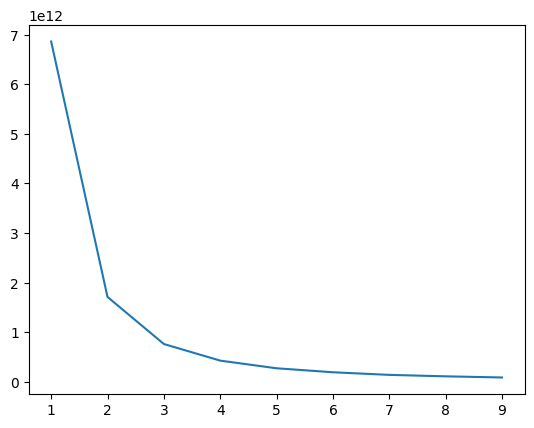

In [ ]:
plt.plot(ks, inertias);


## **7.2.  Kmeans**

In [ ]:
clustering_k3=  KMeans(n_clusters=3)
train_set_encoded_kmeans = train_set_encoded.copy()
clustering_k3.fit(train_set_encoded_kmeans[features_num])

KMeans(n_clusters=3)

In [ ]:
train_set_encoded_kmeans['cluster'] = clustering_k3.predict(train_set_encoded_kmeans[features_num])
train_set_encoded_kmeans.head(2)

,artist_name,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,time_signature,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,cluster
16883,5965,8,21,0.490,0.304,2,0.728440,0,0.0515,0.83600,...,11.845641,0.8,True,False,False,False,False,False,False,1
130122,2541,39,15,0.682,0.799,11,0.758443,0,0.0398,0.00901,...,12.910165,0.8,False,False,False,False,True,False,False,0


In [ ]:
train_set_encoded_kmeans['cluster'].value_counts(normalize=True)

cluster
1    0.346469
2    0.340435
0    0.313095
Name: proportion, dtype: float64

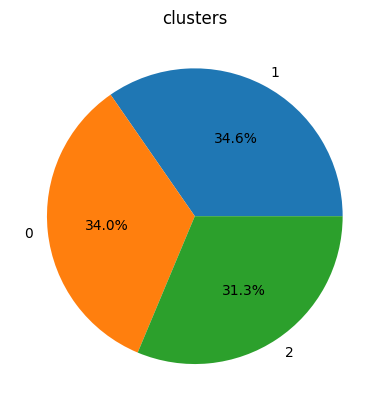

In [ ]:
plt.pie(train_set_encoded_kmeans['cluster'].value_counts(normalize=True), autopct= '%1.1f%%', labels=train_set_encoded_kmeans['cluster'].unique())
plt.title('clusters');


In [ ]:
train_set_encoded_kmeans.groupby('cluster').describe()

artist_name                                                            \
              count          mean          std  min     25%      50%      75%   
cluster                                                                         
0           48831.0  11424.292642  6641.974677  1.0  5654.0  11458.0  17168.0   
1           54036.0  11459.052298  6661.691045  0.0  5661.0  11508.0  17214.0   
2           53095.0  11450.268010  6604.111745  1.0  5702.0  11529.0  17124.0   

                 popularity             ... duration_ms             \
             max      count       mean  ...         75%        max   
cluster                                 ...                          
0        22864.0    48831.0  33.046139  ...   12.424256  15.203301   
1        22864.0    54036.0  32.891350  ...   12.419841  15.424011   
2        22866.0    53095.0  32.725662  ...   12.428033  15.471316   

        time_signature                                               
                 count      mean       std  min  25%  50%  75%  max  
cluster                                                              
0              48831.0  0.786099  0.075029  0.0  0.8  0.8  0.8  1.0  
1              54036.0  0.784351  0.077660  0.0  0.8  0.8  0.8  1.0  
2              53095.0  0.784021  0.077172  0.0  0.8  0.8  0.8  1.0  

[3 rows x 128 columns]

# **8. MODELS**


 **8.1.   Models selected to be analysed**

 **8.2.   Linear regression**

 **8.3.   Gradient Boosting**

 **8.4.   XGBoost**


### **8.1.   Models selected to be analysed**

   8.1.1 X train/test train CV different features lists'
   
   8.1.2. Fitting preparation


#### **8.1.1.   X train/test train CV different features lists'**


Cross validation for different features lists

In [ ]:
# x y train/test
X_train = train_set_encoded.drop(columns=['popularity'])
y_train = train_set_encoded['popularity']
X_test = test_set_encoded.drop(columns=['popularity'])
y_test = test_set_encoded['popularity']

In [ ]:
xgb_reg = XGBRegressor(max_depth=10, random_state=42)
lgb_reg = LGBMRegressor(max_depth=10, random_state=42, verbose=0)
gbr_reg = GradientBoostingRegressor(max_depth=10, random_state=42)
linear_reg = LinearRegression()

# Models dic
modelos = {
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg,
    "Gradient Boosting": gbr_reg,
    "Linear Regression": linear_reg
}

In [ ]:
# Features list
features_set = ['minimum', 'minimum_with_artist', 'minimum_with_genre']

# Dic
X_train_dict = {}
X_test_dict = {}

# Features for dic
features_corr = [
    'duration_ms',
    'instrumentalness',
    'danceability',
    'liveness',
    'energy',
    'speechiness',
    'tempo',
    'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'year_2023'
]

features_corr_artist = [
    'duration_ms',
    'instrumentalness',
    'danceability',
    'liveness',
    'energy',
    'speechiness',
    'tempo',
    'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'year_2023',
    'artist_name'
]

features_corr_genre = [
    'duration_ms',
    'instrumentalness',
    'danceability',
    'liveness',
    'energy',
    'speechiness',
    'tempo',
    'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'year_2023',
    'genre'
]

# Filter existing columns
def filter_existing_columns(df, columns):
    filtered_columns = [col for col in columns if col in df.columns]
    missing_columns = set(columns) - set(filtered_columns)
    if missing_columns:
        print(f"Columnas faltantes en el dataframe: {missing_columns}")
    return filtered_columns

# Filter features
features_corr_filtered = filter_existing_columns(train_set_encoded, features_corr)
features_corr_artist_filtered = filter_existing_columns(train_set_encoded, features_corr_artist)
features_corr_genre_filtered = filter_existing_columns(train_set_encoded, features_corr_genre)

# Divide data
for nombre, feature_list in zip(features_set, [features_corr_filtered, features_corr_artist_filtered, features_corr_genre_filtered]):
    X_train_dict[nombre] = train_set_encoded[feature_list]
    X_test_dict[nombre] = test_set_encoded[feature_list]

# check
print("Conjuntos de características de entrenamiento:")
for nombre, data in X_train_dict.items():
    print(f"{nombre}: {data.shape}")

print("\nConjuntos de características de prueba:")
for nombre, data in X_test_dict.items():
    print(f"{nombre}: {data.shape}")


Conjuntos de características de entrenamiento:
minimum: (155962, 13)
minimum_with_artist: (155962, 14)
minimum_with_genre: (155962, 14)

Conjuntos de características de prueba:
minimum: (38991, 13)
minimum_with_artist: (38991, 14)
minimum_with_genre: (38991, 14)


In [ ]:
# CV
def evaluate_models():
    results = {}
    for features_set, X_train in X_train_dict.items():
        results[features_set] = {}
        print(f"For SET {features_set}:")
        for tipo, modelo in modelos.items():
            print(f"{tipo}: ", end=" ")
            scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
            mean_score = np.mean(scores)
            print(f"Mean MAE: {mean_score:.4f}")
            results[features_set][tipo] = mean_score
        print("******")
    return results

results = evaluate_models()

For SET minimum:
Lightgbm:  Mean MAE: -10.9491
XGBoost:  Mean MAE: -11.2472
Gradient Boosting:  Mean MAE: -10.9033
Linear Regression:  Mean MAE: -11.4980
******
For SET minimum_with_artist:
Lightgbm:  Mean MAE: -10.7723
XGBoost:  Mean MAE: -10.6038
Gradient Boosting:  Mean MAE: -10.1149
Linear Regression:  Mean MAE: -11.4949
******
For SET minimum_with_genre:
Lightgbm:  Mean MAE: -7.7261
XGBoost:  Mean MAE: -7.7868
Gradient Boosting:  Mean MAE: -7.5338
Linear Regression:  Mean MAE: -11.4904
******


In [ ]:
# Folder model if not existing
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'results_evaluate_model_0pop.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(results, file)

    print(f"Results saved to {results_file_path}")

Results saved to models/results_evaluate_model_0pop.pkl


#### **8.1.2.   Fitting preparation**


In [ ]:
selected_features = features_corr_genre

In [ ]:
#  X_train  X_test for features selected
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### **8.2.  Linear regression**


In [ ]:
linear_reg_short = LinearRegression()
linear_reg_short.fit(X_train_selected, y_train)
y_pred = linear_reg_short.predict(X_test_selected)

# MAPE
mape_adjusted = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE ajustado:", mape_adjusted.round(4))

MAPE ajustado: 0.7926


In [ ]:
# Folder model if not existing
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'modelo_linear_reg_min_year.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(linear_reg, file)

    print(f"Results saved to {results_file_path}")

'''
## Cargar el modelo desde el archivo
with open('modelo_linear_reg.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Hacer predicciones con el modelo cargado
y_pred_loaded = loaded_model.predict(X_test_selected)

# Calcular y mostrar el MAPE ajustado
mape_adjusted_loaded = mean_absolute_percentage_error(y_test, y_pred_loaded)
print("MAPE ajustado del modelo cargado:", mape_adjusted_loaded.round(4))
'''

Results saved to models/modelo_linear_reg_min_year.pkl


'\n## Cargar el modelo desde el archivo\nwith open(\'modelo_linear_reg.pkl\', \'rb\') as file:\n    loaded_model = pickle.load(file)\n\n# Hacer predicciones con el modelo cargado\ny_pred_loaded = loaded_model.predict(X_test_selected)\n\n# Calcular y mostrar el MAPE ajustado\nmape_adjusted_loaded = mean_absolute_percentage_error(y_test, y_pred_loaded)\nprint("MAPE ajustado del modelo cargado:", mape_adjusted_loaded.round(4))\n'

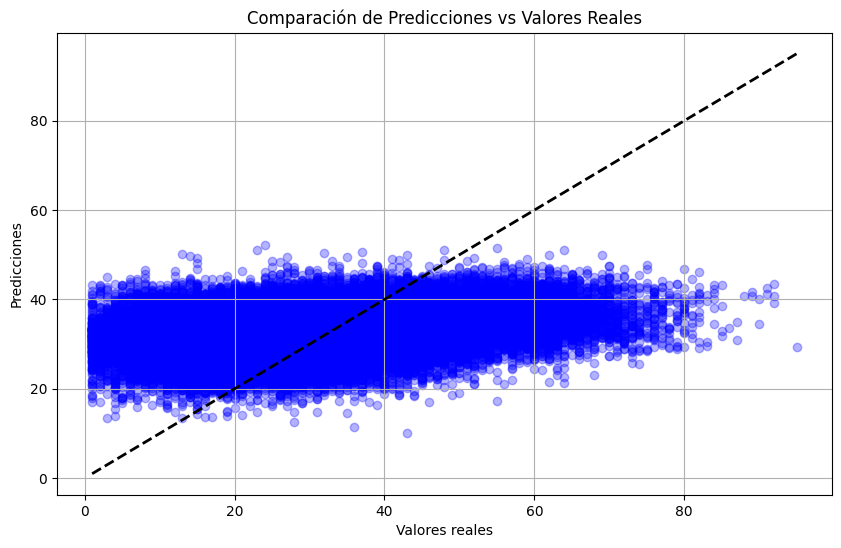

In [ ]:
# Plot pred vs real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

### **8.3. Gradient Boosting**

In [ ]:
param_grid = {
    'n_estimators': [150,200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5]
}

gb_reg_short = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb_reg_short, param_grid=param_grid,
                           scoring='neg_mean_absolute_percentage_error',
                           cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train_selected, y_train)

# Best hyperparameters
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Best model
best_gb_reg_short = grid_search.best_estimator_

# Test pred
y_pred = best_gb_reg_short.predict(X_test_selected)

# MAPE
mape_adjusted = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE ajustado:", mape_adjusted.round(4))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores hiperparámetros encontrados:
{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 200}
MAPE ajustado: 0.477


In [ ]:
# Folder model if not existing
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'mejor_modelo_gb_reg_short.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(best_gb_reg_short, file)

    print(f"Results saved to {results_file_path}")

Results saved to models/mejor_modelo_gb_reg_short.pkl


'\n## Cargar el modelo desde el archivo\nwith open(\'modelo_linear_reg.pkl\', \'rb\') as file:\n    loaded_model = pickle.load(file)\n\n# Hacer predicciones con el modelo cargado\ny_pred_loaded = loaded_model.predict(X_test_selected)\n\n# Calcular y mostrar el MAPE ajustado\nmape_adjusted_loaded = mean_absolute_percentage_error(y_test, y_pred_loaded)\nprint("MAPE ajustado del modelo cargado:", mape_adjusted_loaded.round(4))\n'

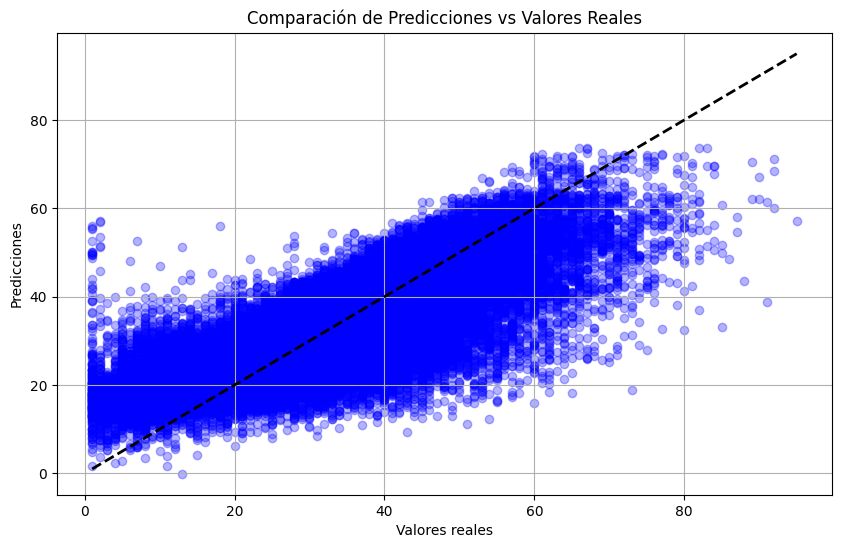

In [ ]:
# PLot pred vs real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

             Feature  Importance
13             genre    0.756747
0        duration_ms    0.060659
11         year_2022    0.045960
1   instrumentalness    0.033138
4             energy    0.025215
2       danceability    0.013997
12         year_2023    0.013340
10         year_2021    0.012548
6              tempo    0.010576
3           liveness    0.009414
5        speechiness    0.008149
9          year_2020    0.006451
8          year_2019    0.002702
7          year_2018    0.001105


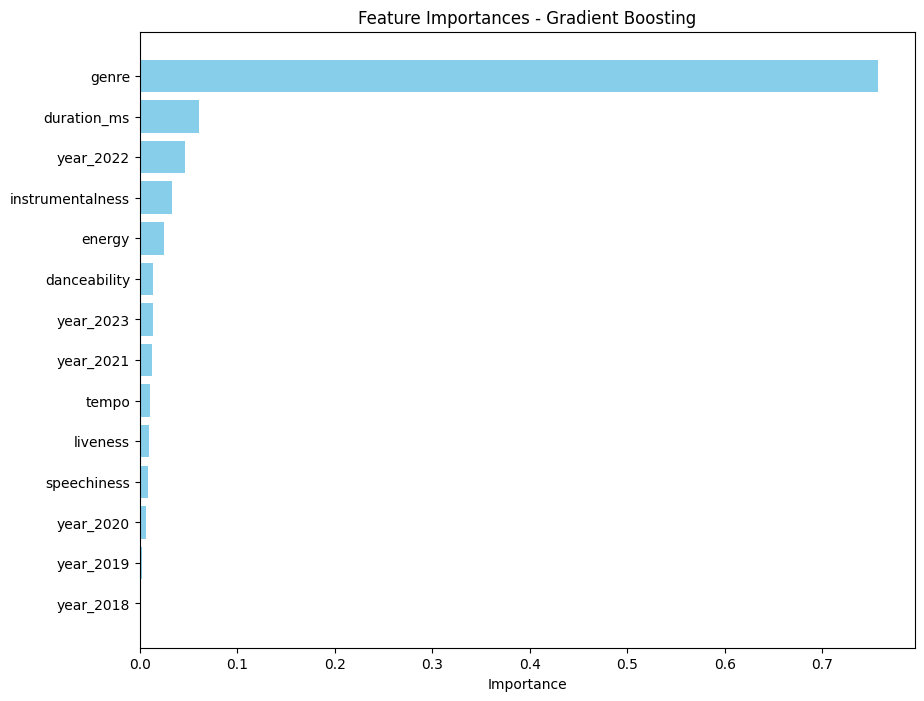

In [ ]:
# Feature importance
importances_gb = best_gb_reg_short.feature_importances_

feature_names = X_train_selected.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_gb
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

### BEST MODELS 😀: similar results on light gbm and xgboost

---



### **8.4. XGBoost  - BEST MODEL**

In [ ]:
param_grid = {
    'n_estimators': [150,200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5]
}

xgb_reg_short = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg_short, param_grid=param_grid,
                           scoring='neg_mean_absolute_percentage_error',
                           cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train_selected, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

best_xgb_reg_short = grid_search.best_estimator_

# Test pred
y_pred = best_xgb_reg_short.predict(X_test_selected)

# MAPE
mape_adjusted = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE ajustado:", mape_adjusted.round(4))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores hiperparámetros encontrados:
{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 200}
MAPE ajustado: 0.475


In [ ]:
# Folder model if not existing
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'mejor_modelo_xbg_reg_short.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(best_xgb_reg_short, file)

    print(f"Results saved to {results_file_path}")

Results saved to models/mejor_modelo_xbg_reg_short.pkl


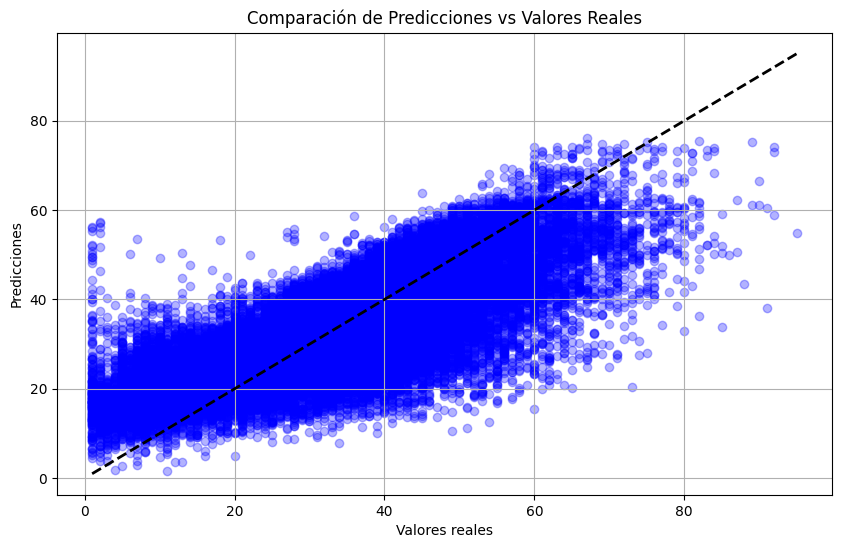

In [ ]:
# Plot pred vs real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

             Feature  Importance
13             genre    0.282681
11         year_2022    0.251802
10         year_2021    0.110410
9          year_2020    0.067822
0        duration_ms    0.062504
8          year_2019    0.046949
1   instrumentalness    0.044998
12         year_2023    0.037936
4             energy    0.026227
2       danceability    0.018047
6              tempo    0.014313
7          year_2018    0.012842
5        speechiness    0.011898
3           liveness    0.011572


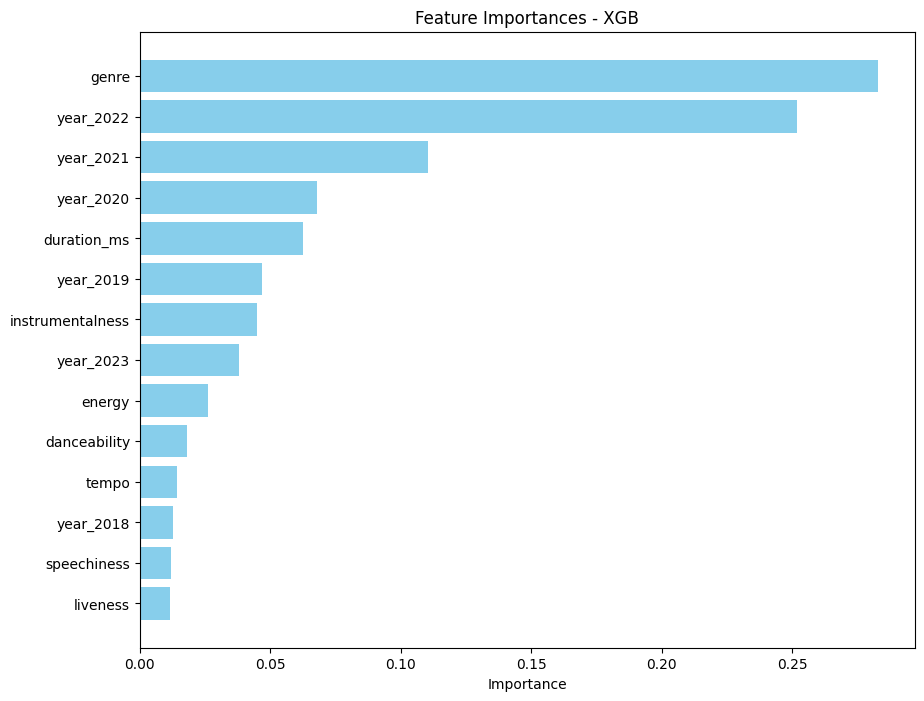

In [ ]:
# Feature importance
importances_xgb = best_xgb_reg_short.feature_importances_

feature_names = X_train_selected.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot features importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - XGB')
plt.gca().invert_yaxis()
plt.show()

### **8.5. LightGBM - BEST MODEL**

In [ ]:
param_grid = {
    'n_estimators': [150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5],
    'num_leaves': [16, 32]
}

lgb_reg_short = LGBMRegressor(random_state=42)

grid_search = GridSearchCV(estimator=lgb_reg_short, param_grid=param_grid,
                           scoring='neg_mean_absolute_percentage_error',
                           cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train_selected, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

best_lgb_reg_short = grid_search.best_estimator_

y_pred = best_lgb_reg_short.predict(X_test_selected)

mape_adjusted = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE ajustado:", mape_adjusted.round(4))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 155962, number of used features: 14
[LightGBM] [Info] Start training from score 32.883407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
# Folder model if not existing
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'mejor_modelo_lgb_reg_short.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(best_lgb_reg_short, file)

    print(f"Results saved to {results_file_path}")

Results saved to models/mejor_modelo_lgb_reg_short.pkl


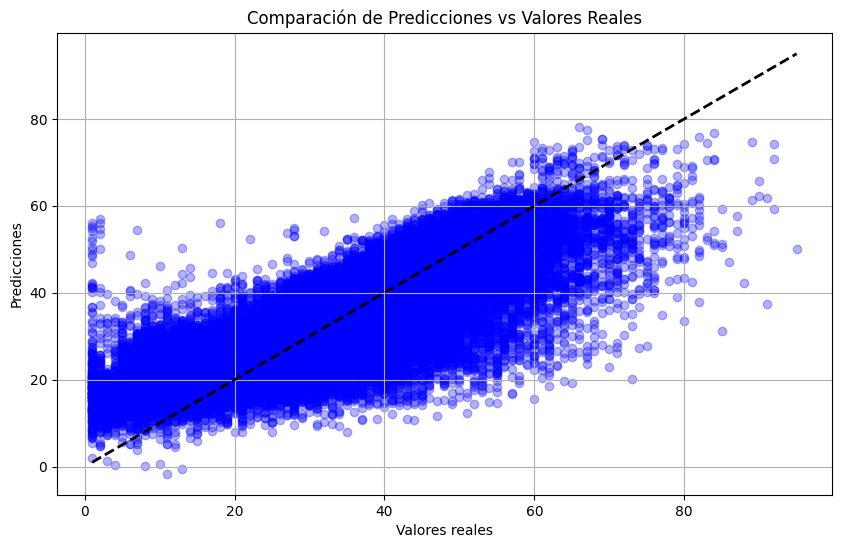

In [ ]:
# Pred vs real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

             Feature  Importance
13             genre        1738
0        duration_ms         633
4             energy         570
2       danceability         524
1   instrumentalness         464
6              tempo         454
3           liveness         420
5        speechiness         407
12         year_2023         237
11         year_2022         108
10         year_2021          75
7          year_2018          63
9          year_2020          59
8          year_2019          43


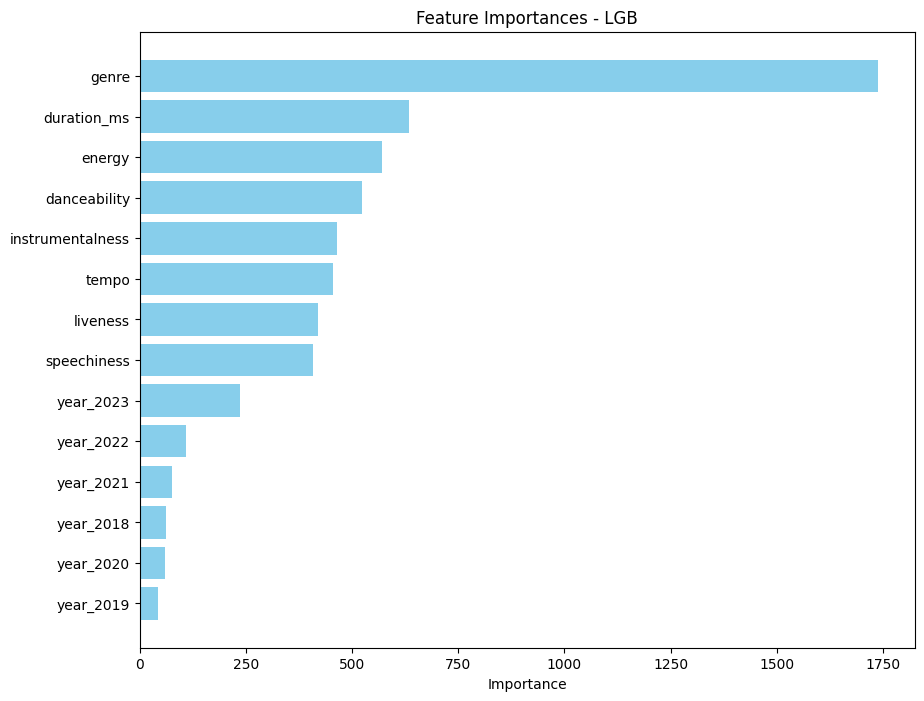

In [ ]:
# Feature importance
importances_lgb = best_lgb_reg_short.feature_importances_

feature_names = X_train_selected.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_lgb
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - LGB')
plt.gca().invert_yaxis()
plt.show()

# **9 New input**


#### **9.1. Input_test**

We provide a ***new input for predicting*** in the model, already normalized,etc

In [ ]:
reg= train_set.iloc[0]
reg

artist_name         Eddie van der Meer
popularity                           8
year                              2017
genre                           guitar
danceability                      0.49
energy                           0.304
key                                  2
loudness                         -9.61
mode                                 0
speechiness                     0.0515
acousticness                     0.836
instrumentalness                 0.912
liveness                        0.0923
valence                          0.343
tempo                          118.472
duration_ms                     139474
time_signature                       4
Name: 16883, dtype: object

In [ ]:
# Sample instance
primer_registro = train_set_encoded.iloc[0]
columnas = list(train_set_encoded.columns)

# Crear new_input como una lista de tuplas (nombre_columna, valor)
new_input = [(columna, primer_registro[columna]) for columna in columnas]
print("Nombres de las columnas y valores del primer registro:")
for nombre, valor in new_input:
    print(f"{nombre}: {valor}")


Nombres de las columnas y valores del primer registro:
artist_name: 5965
popularity: 8
genre: 21
danceability: 0.49
energy: 0.304
key: 2
loudness: 0.7284403298016733
mode: 0
speechiness: 0.0515
acousticness: 0.836
instrumentalness: 0.912
liveness: 0.0923
valence: 0.343
tempo: 0.47874244842705027
duration_ms: 11.845640652713728
time_signature: 0.8
year_2018: False
year_2019: False
year_2020: False
year_2021: False
year_2022: False
year_2023: False


In [ ]:
# Input
new_input = {
    'artist_name': 5965,
    'genre': 21,
    'danceability': 0.49,
    'energy': 0.304,
    'key': 2,
    'loudness': 0.7284403298016733,
    'mode': 0,
    'speechiness': 0.0515,
    'acousticness': 0.836,
    'instrumentalness': 0.912,
    'liveness': 0.0923,
    'valence': 0.343,
    'tempo': 0.47874244842705027,
    'duration_ms': 11.845640652713728,
    'time_signature': 0.8,
    'year_2017': 1,
    'year_2018': 0,
    'year_2019': 0,
    'year_2020': 0,
    'year_2021': 0,
    'year_2022': 0,
    'year_2023': 0
}



In [ ]:
#  input to DataFrame
new_input_df = pd.DataFrame([new_input])

### **9.2.Prediction**

#### **9.2.1. LR prediction**

In [ ]:
new_prediction_reg = linear_reg_short.predict(new_input_df[selected_features])

print("Nueva predicción:", new_prediction_reg)


Nueva predicción: [28.99177231]


In [ ]:
# Folder model if not existing
models_dir = 'preds'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'pred_reg.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(new_prediction_reg, file)

    print(f"Results saved to {results_file_path}")

Results saved to preds/pred_reg.pkl


#### **9.2.2. GB prediction**

In [ ]:
new_prediction_gb = best_gb_reg_short.predict(new_input_df[selected_features])

print("Nueva predicción:", new_prediction_gb)


Nueva predicción: [16.08135267]


In [ ]:
# Folder model if not existing
models_dir = 'preds'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'pred_gb.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(new_prediction_gb, file)

    print(f"Results saved to {results_file_path}")

Results saved to preds/pred_gb.pkl


#### **9.2.3.  XGB prediction**

In [ ]:
new_prediction_xgb = best_xgb_reg_short.predict(new_input_df[selected_features])

print("Nueva predicción:", new_prediction_xgb)

Nueva predicción: [15.956667]


In [ ]:
# Folder model if not existing
models_dir = 'preds'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'pred_xbg.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(new_prediction_xgb, file)

    print(f"Results saved to {results_file_path}")

Results saved to preds/pred_xbg.pkl


#### **9.2.4.  LGB prediction**

In [ ]:
new_prediction_lgb = best_lgb_reg_short.predict(new_input_df[selected_features])

print("Nueva predicción:", new_prediction_lgb)

Nueva predicción: [15.27421991]


In [ ]:
# Folder model if not existing
models_dir = 'preds'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'pred_lgb.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(new_prediction_lgb, file)

    print(f"Results saved to {results_file_path}")

Results saved to preds/pred_lgb.pkl


# **10 Conclusions**

Light GBM and XG Boost are the best models with a MAPE arround 0.475, genre is quite relevant as feature, as well as duration danceability or latest years
Models have already been saved, nevertheless we finish saving both again

In [ ]:
# Folder model if not existing
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'mejor_modelo_xbg_reg_short.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(best_xgb_reg_short, file)

    print(f"Results saved to {results_file_path}")

In [ ]:
# Folder model if not existing
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path= os.path.join(models_dir, 'mejor_modelo_lgb_reg_short.pkl')
with open(results_file_path, 'wb') as file:
    pickle.dump(best_lgb_reg_short, file)

    print(f"Results saved to {results_file_path}")